## Mortgage_Solution

Mortgage Solutions deals with all kinds of home loans. Their business addresses all kinds of areas in Botswana, urban, semi-urban and rural areas. Their process can be summarised to a customer applying for the home loan and the company validating the loan.

Mortgage Solutions would like to automate the eligibility process using the details the customers provide while filling out an online application form.
To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

## 1.About The Dataset

- Loan _ID- Unique loan UD
- Gender- Male/female
- Dependent- Applicant married,(y/n)
- Educations - Applicant Education (Graduate/ Under Graduate) Self_Emoloyed- Self employed (Y/N)
- Applicant Income -Coappilcant income
- Loan_Amount_Term - Term of loan in months
- Credit_History - Credit history meets guideslines
- Property_Area - Urban/ Semi Urban / Rurai
- Loan_Status - Loan approved (y/n)

Loan status is our variable to be predicted.

There are two files that this model is to build and tested upon. The train file consist all detail including the loan_status of the cus tomer. The testting file consist of all the details previded by the customers without the loan_status varible. 

### Meet the team


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Importing_Dependencies">Importing_Dependencies</a></li>
        <li><a href="https://Exploratory_DataAnalysis- Non-Graphical"> Exploratory DataAnalysis- Non-Graphical</a></li>
        <li><a href="https://#Feature_Engineering">Feature Engineering</a></li>
        <li><a href="https://#Exploratory_Data_Analysis - Graphical">Exploratory Data Analysis - Graphical</a></li> 
        <li><a href="https://#Modeling">Modeling</a></li> 
        <li><a href="https://#Model_Analysis">Model Analysis</a></li> 
        <li><a href="https://#Submission_File_Generation">Submission File Generation</a></li>
        <li><a href="https://#Pickling the Model">Pickling_the_Model</a></li> 
        <li><a href="https://#Conclusion">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

### Import Dependencies

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

from sklearn.metrics import (f1_score, confusion_matrix, precision_score, recall_score)
import pickle

In [82]:
url1 = 'https://raw.githubusercontent.com/bvtoan416c/Finance-MortgageSolution/main/train.csv'
df_train=pd.read_csv(url1,index_col=0)
url2 = 'https://raw.githubusercontent.com/bvtoan416c/Finance-MortgageSolution/main/test.csv'
df_test=pd.read_csv(url2,index_col=0)

## 2 . Exploratory Data Analysis - Non -Graphical

- This is a crucial overview of the dataset where we get to observation non-Graphical statistic like missing values in the dataset and thier ratios of the dataset, unique values of the categorical feature and their value counts in the dataset.

In [83]:
# For us to get an overview of the dataset we can use the head function
df_train.head(5) # check 5 columns

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
print('There are {} number of rows and {} number of columns in this dataset'.format(df_train.shape[0],df_train.shape[1]))

There are 614 number of rows and 12 number of columns in this dataset


In [85]:
# using the info attribute, we get a view of the dataset in its various
# aspect including: datatype , non-nullvalues,memory
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


Every columns in this dataset shoil have a total of 614 entries and any value less than that is an indication of there being null values in that column. Columns missing values in this dataset include:
- Gender
- Married
- Self_Employed
- LoanAmount
- LoanAmountTerm and
- Credit_History

With missing values there are various ways to check their significance in a dataset. If they exceed a predetermined threshold put forth by the data scientist working with the dataset(in this case me), then they can be regarded to be significant in this dataset and attempting to impute data of any measure of central tendencies would affect the actual information held by the dataset. This is to say we may end up making up too many new entries in a praticular column that we would lose the actual information that is had by the dataset, for this reason we instead discard that particular column with the significant number of missing values. The threshold I would set for this dataset is 25%. Any column with more than 25% of 614 entries will be discarded

In [86]:
# Here we will investigate further and print out what percentage
# are of the missing values in each column
display("Gender column has the {}% missing values".format(round(df_train['Gender'].isnull().sum()/len(df_train)*100,2)))
display("Married column has the {}% missing values".format(round(df_train['Married'].isnull().sum()/len(df_train)*100,2)))
display("Dependents column has the {}% missing values ".format(
         round(df_train['Dependents'].isnull().sum()/len(df_train)*100,2)))
display("Selft Employeed column has the missing {}% missing values".format(
        round(df_train['Self_Employed'].isnull().sum()/len(df_train)*100,2)))
display("Loan Amount column has the {}% missing values".format(
        round(df_train['LoanAmount'].isnull().sum()/len(df_train)*100,2)))
display("Loan_Amount_Term and column has the {}% missing values".format(
        round(df_train['Loan_Amount_Term'].isnull().sum()/len(df_train)*100,2)))
display("Credit_History and column has the {}% missing values".format(
        round(df_train['Credit_History'].isnull().sum()/len(df_train)*100,2)))


'Gender column has the 2.12% missing values'

'Married column has the 0.49% missing values'

'Dependents column has the 2.44% missing values '

'Selft Employeed column has the missing 5.21% missing values'

'Loan Amount column has the 3.58% missing values'

'Loan_Amount_Term and column has the 2.28% missing values'

'Credit_History and column has the 8.14% missing values'

In [87]:
# Check type of train_datframe 
df_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [88]:
df_train.shape

(614, 12)

All object datatypes so if the data entered in them include only characters or both numbers and characters, if not then they should be either intehers or float dattypes. Here we check to make sure that each column is the rught datatypes corredponsing the data entered in that particular columns.

In [89]:
df_train[["Gender","Married",'Dependents','Education','Self_Employed','Property_Area','Loan_Status']]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
Loan_ID,,,,,,,
LP001002,Male,No,0,Graduate,No,Urban,Y
LP001003,Male,Yes,1,Graduate,No,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,Rural,Y
LP002983,Male,Yes,1,Graduate,No,Urban,Y


In [90]:
# we can cinfirm this by checking the unique values of this to see
# whether it is categorycal or numeric
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 At first glance, ignoring the "NaN" entries, these columns lokk like they are fine . But when we take a close look to teh values are set to be floats, we can notice that there is no information help in the decimals those values saved as floats , this is turn wasting storahe spcace in our datset. If this is true od all our numerical entries in this datset when we are better off having numeric columns as int64(integers)

In [91]:
# Here we investigate the remaining data types, the int64 /integers and float 64
# float
df_train[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_ID,,,,,
LP001002,5849,0.0,NaN,360.0,1.0
LP001003,4583,1508.0,128.0,360.0,1.0
LP001005,3000,0.0,66.0,360.0,1.0
LP001006,2583,2358.0,120.0,360.0,1.0
LP001008,6000,0.0,141.0,360.0,1.0


- Only the CoapplicationIncome columns seem to hvae stored in its decimal spaces, the rest columns saved as float datatypes do not need the space that income with saving datatypes as floats, they can be converted to int 64 for effcient.
- A columns that has peaked my interest while looking at this summary of sums is the Credit_History column. The sum seems enough for it;s values to have been intended as categorical instead of them being a measured of an applications credit score.

In [92]:
# If the sums of these columns do not have anydecimals then may suspcritions are values
df_train[["CoapplicantIncome",'LoanAmount','Loan_Amount_Term','Credit_History']].sum()

CoapplicantIncome    995444.919989
LoanAmount            86676.000000
Loan_Amount_Term     205200.000000
Credit_History          475.000000
dtype: float64

In [93]:
# The following is to check unique values included in the column
# Credit_History
df_train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

- As suspected, the column Credit_History is infact a binary categorical column, it only has 2 unique values which include 1.0 and 0.0, which means they can be translated to Yes or No values or True or False values. With regards to credit history this can be interpreted as Good credit history or Bad credit history. 1 can be considered as Good credit history and 0 can be considered as Bad credit history

### Feature Engineering

- Feature Engineering is about correcting the features or indepenent columns that may have been entered wrongly in the dataset to make sure they are understandable by our models.

- In this part of the notebook we will implement all the imputation to the null values we spoke of in the previous section. All the ways we spoke of to correct our features will be done in this part of the notebook before we proceed to visualize our dataset

In [94]:
# Here we create a checkpoint with our dataset and save it into a different
# variable incase we need to refer back to refer its original state after egineering
# some faeture
df=df_train.copy()
df_t=df_test.copy()

- We will start of with the Gender column. Fuguring how to impute the three measures of central tendency is dependent on the data type, for instance a categorical column cannot be imputed using the mean of the column. Because of this ist best we are care ful which measure we choose for or missing values.

- The column we're imputing missing values in and their dattypes include
- Gender-object
- Married-object
- Dependents- object
- Self_Employed - object
- LoanAmount - float64
- Loan_Amount_Term - float64
- Credit_History - float6

- But as we discussed in the previous section, the Credit g=history column should actually be an object dattype which would reflect its binary categorical nature

In [95]:
 def data_imputer(df):
    '''This function is intended to impute missing values depending on the
    datatype of the column itself. If the column is an object datatype then the
    mode is used, if the data type is float or integer then the mean central
    tendency is used. The exception is the Credit_History column, it is a float
    datatype but it is imputed using its mode.
    Input: df - the dataframe to which the missing values exist.
    Output: the info of the dataframe which summarises null-values in the dataset
    and the column data types
    '''
    for i in df.columns:
        if i == 'Credit_History':
            df[i].fillna(df[i].mode()[0], axis=0, inplace=True)
            
        if df[i].isnull().sum() > 0 and df[i].dtypes == 'O':
            df[i].fillna(df[i].mode()[0], axis=0, inplace=True)
            
        if df[i].isnull().sum() > 0 and df[i].dtypes == 'float':
            
            df[i].fillna(df[i].mean(), axis=0, inplace=True)
        if df[i].isnull().sum() > 0 and df[i].dtypes == 'int':
            
            df[i].fillna(df[i].mean(), axis=0, inplace=True)
    return df

df = data_imputer(df=df)


In [96]:
df_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [97]:
# we run the same imputation on the tets data
df_t=data_imputer(df=df_t)
df['Credits_History']=df['Credit_History'].astype(str)
df[['LoanAmount','Loan_Amount_Term']]=df[['LoanAmount','Loan_Amount_Term']].astype(int)

df_t['Credit_History']=df_t["Credit_History"].astype(str)
df_t[['LoanAmount','Loan_Amount_Term']]=df_t[['LoanAmount','Loan_Amount_Term']].astype(int)

In [98]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credits_History
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1.0,Urban,Y,1.0
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N,1.0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y,1.0
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y,1.0
LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,Y,1.0


In [99]:
df['Loan_Term_Year']=df['Loan_Amount_Term']/12
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credits_History,Loan_Term_Year
Loan_ID,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1.0,Urban,Y,1.0,30.0
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N,1.0,30.0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y,1.0,30.0
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y,1.0,30.0
LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,Y,1.0,30.0


Another closer look at the dataset , the LoanAmount column is already of a different scale than any other ampount mentioned in other columns e.g the Aplicatincome and the Coapplicatcome columns. I say this because it is importical for an individual to loan P128 for mortage and their iender agress for them to pay in it 30years while they are earning P4.583 per month. The only resonable explanation is that the LoanAmount cloumn is rouded off to the nearest thousand . For interpretation of our analysis it would wise to include a column that correst reflects this information. The column will be named Loan_Amount (k) to represent them having ben multiple by 100.

In [100]:
df['Loan_Amount(k)']=df['LoanAmount']*100
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credits_History,Loan_Term_Year,Loan_Amount(k)
Loan_ID,,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1.0,Urban,Y,1.0,30.0,14600
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N,1.0,30.0,12800
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y,1.0,30.0,6600
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y,1.0,30.0,12000
LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,Y,1.0,30.0,14100


In [101]:
df_eng=df.drop(labels=df[['Loan_Term_Year',"Loan_Amount(k)"]],axis=1)
df_eng.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credits_History
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1.0,Urban,Y,1.0
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N,1.0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y,1.0
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y,1.0
LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,Y,1.0


In [102]:
def dummy_creator(df):
    
    dummies = pd.get_dummies(df[['Gender', 'Married', 'Education',
                                    'Self_Employed', 'Property_Area']],
                                drop_first=True)
    df_eng = df.drop(labels=df[['Gender', 'Married', 'Education',
                                'Self_Employed', 'Property_Area']], axis=1)
    df_eng_dummies = pd.concat([df_eng,dummies], axis=1)
    df_eng_dummies = df_eng_dummies.reindex(columns=['Loan_ID', 'Gender_Male',
                                            'Married_Yes', 'Education_Not Graduate',
                                            'Self_Employed_Yes', 'ApplicantIncome',
                                            'CoapplicantIncome', 'LoanAmount',
                                            'Loan_Amount_Term', 'Credit_History',
                                            'Property_Area_Semiurban', 'Property_Area_Urban',
                                            'Loan_Status'])
    return df_eng_dummies

In [103]:
df_new=dummy_creator(df_eng)
df_new.head()

,Loan_ID,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
Loan_ID,,,,,,,,,,,,,
LP001002,NaN,1,0,0,0,5849,0.0,146,360,1.0,0,1,Y
LP001003,NaN,1,1,0,0,4583,1508.0,128,360,1.0,0,0,N
LP001005,NaN,1,1,0,1,3000,0.0,66,360,1.0,0,1,Y
LP001006,NaN,1,1,1,0,2583,2358.0,120,360,1.0,0,1,Y
LP001008,NaN,1,0,0,0,6000,0.0,141,360,1.0,0,1,Y


In [104]:
df_t_dummies=dummy_creator(df_t)
df_t_dummies=df_t_dummies.drop(labels=df_t_dummies[['Loan_Status']],axis=1)

- Exploratory DataAnalysis is an apportunity to answer question about the trends in our dataset and get involve in this dataset. In this section we will explore various question graphical foor easier intepretation.

The question we will in this section will include:
 _ Are the loans approved more than the ones not approved
 _ Who are more likely yo request for loan
 1. Their gender,
 2. Their martital status
 3. How many their depenndents are
 4. What their education status is
 5. What their Credit History is
 6. Lastly their Salaries
 
 ** What the common characteristics og the individual's whose loans have been approved are, this is with regards to their:
 1. Their gender
 2. Their matrital status
 3. The number of dependents they have
 4. Their Education, whether thay have graduated or not.
 5. The highest amount requested by these individuals
 6. The duration to which they intend to pay the loan in days (Loan_Amoun_Term)
 7. The distribution or thiar salaries;
 8. Where this class of customers mostly reside (Property_Area)
 9. Their Credit History, where it is a significant creiteria for loans to get approved or not.
 10. Lastly, what salaries of salaries input a Coapplicant Income.
 

In [105]:
# fisrtly we will start by answering the first question
# Are the loans evenly approved in this dataset or not
px.histogram(df,x='Loan_Status',color='Loan_Status',title="Approved Loans")

- Ther loan are not evently approved, there are more approved loans than are declined. The percentages can be seen below.

**Number of customers approached**

In [106]:
display("The approved applications are{}% to the total application\
".format(round(len(df['Loan_Status'].loc[(df['Loan_Status']=="Y")])/len(df)*100,2)))

'The approved applications are68.73% to the total application'

- This is most likely to affect our model. More on this will be explained in the model section.
- Who is more likely to request for mortgage loan. Right now we are talking regards tyo genders, or are thay equally making requests?

In [107]:
px.histogram(df,x='Gender',color="Gender",title="Count by Gender")

In [108]:
display("Men are nmore likely than women to apply for a mortgage loan, with a\
{}% of men having applied\
".format(round(len(df['Gender'].loc[(df['Gender']=='Male')])/len(df)*100,2)))

'Men are nmore likely than women to apply for a mortgage loan, with a81.76% of men having applied'

- Research done using data from Experian, a major credit reporting agency, has shown that in 2020 "men hold about 10% more mortgage and home equity line of credit (HELOC) debt" (S. Karl 2022). This could explain why in our dataset there is a large number of men applying for mortgage loans with Mortgage Solutions

In [109]:
px.box(df,y="Loan_Amount(k)",x='Dependents',color='Dependents',points='all',
      title='Distirbution od Loan Amounts by Dependents')

- There are soe clear outlier in the above analysis, with the 0 and 3 depedents individuals requesting high mortgage loan from Mortgage Solutions. The question that comes up from this is between all four categories applications. who's sum of request is the highest.

In [110]:
# To do this we group the loan amounts by dependents udiong the following groupby
# code
dep_sum = df[['Loan_Amount(k)', 'Dependents']].groupby(
    by='Dependents', axis=0).sum().reset_index()
px.pie(dep_sum, values='Loan_Amount(k)', names='Dependents', hole=0.4,
        title='Contribution to Total Loan Amount by Dependents')

- Applicants wwith no or 0 dependents make up more than hair og the total mortgage loans applied for. This colud be becouse they are typically individuals who are still starting out their lives and investing in their fisrt, if age of applicants was could be able to prove third hyptothensis by confirming their age distribution as that generally lower than 38. Individualy with ownership with maortgage loan from MortgageSolution.

In [111]:
px.box(df, y='ApplicantIncome', x='Education', color='Education',
    color_discrete_map={'Graduate': '#3282B8',
                        'Not Graduate': '#AF0171'}, points='all',
    title='Distribution of Applicant Income by Education')


In [112]:
px.scatter(df, x='ApplicantIncome', y='Loan_Amount(k)', color='Education',
            color_discrete_map={'Graduate': '#3282B8',
                                'Not Graduate': '#AF0171'},
                title='Loan Amount by Applicant Income')

In [113]:
grad = df[['Loan_Status']].loc[(
    df['Education'] == 'Graduate')].value_counts().rename_axis(
        'grad_loan_status').reset_index(name='counts')
px.pie(grad, values='counts', names='grad_loan_status', hole=0.4,
        color='grad_loan_status', color_discrete_map={'Y': '#3282B8',
                                                    'N': '#1B262C'},
title='Proportion of Approved to Decline Mortgage Loans - Graduate')

In [114]:
ngrad = df[['Loan_Status']].loc[(
    df['Education'] == 'Not Graduate')].value_counts().rename_axis(
        'ngrad_loan_status').reset_index(name='counts')
px.pie(ngrad, values='counts', names='ngrad_loan_status', hole=.4,
        color='ngrad_loan_status', color_discrete_map={'Y': '#AF0171',
                                                        'N': '#4C0033'},
        title='Proportion of Approved to Decline Mortgage Loans - Non Graduate')

- This a 9.6% differnece in the ratios of martgage loan approvals and desclines by gradya=uates, wwith graduates seeing more approvals. The desserence in approval cannot be considered do imbalanced thats its could significant affect the behavior or represone of our model.
- Lastly, the question to answer would be betwwen married and single applicants, whose loan term is longer to answer this question we first need to find the distribution of loan term and after consider between those married and single who's applied the most loans.

Text(0.5, 1.0, 'Number Of Married vs. Single')

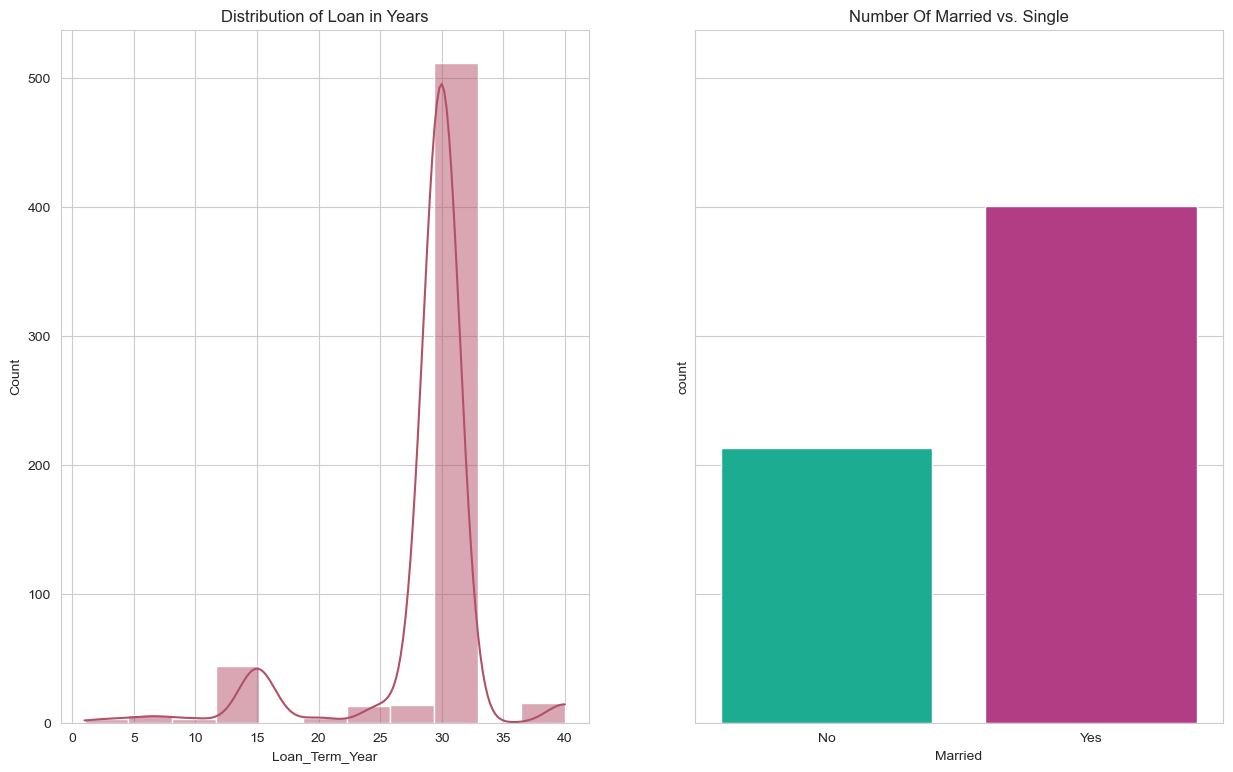

In [115]:
# Here we begin with the distribution of the Loan term
fgi,(ax1,ax2) = plt.subplots(1,2,figsize =(15,9), sharey =True)
sns.histplot(df['Loan_Term_Year'], kde =True, ax =ax1, color ="#B25068")
sns.countplot(x= 'Married', data =df, ax=ax2, palette ={"Yes":'#C62A88',
                                                       "No":'#03C4A1'})
ax1.set_title("Distribution of Loan in Years")
ax2.set_title("Number Of Married vs. Single")

- The loan term are mostly centered around the 30 year mark which means most of the loans duration are to be paid of 30 years time. On the right hand side married people are applying for martgage than single people, this could be an indicator of more people wanting to buy family homes than bachekor homes.
- To check whose loan term is longer we would need to plot the everage loan term of both single and married applicants and observe which id the highest of the two.

In [116]:
mrd=df[['Married','Loan_Term_Year']].groupby(
     by="Married",axis=0).mean().reset_index()
px.pie(mrd,values="Loan_Term_Year",names="Married",color="Married",
      hole=0.4,color_discrete_map={"Yes":"#C62A88","No":"#03C4A1"},
      title='contribution of loan Term years married application')

In [117]:
proA = df[['Property_Area']].loc[(
    df['Loan_Status'] =='Y')].value_counts().rename_axis(
        "Property_Area").reset_index(name="counts")
px.funnel(proA, x="counts", y='Property_Area', color='Property_Area',
         color_discrete_map={'Urban': '#FC85AE', 'Semiurban': '#37AA9C',
                            'Rural': '#2D4059'},
         title = "Loan Approvals by Property Area")

Semiurban areas mortgage loans are being approved more than any other areas. This could be because urban areas are generally more expensive and rural areas are known to be less comfortable. This brings us back to the initial thesis that most of the applicants contained in this dataset are starting out their lives in new homes because although semiurban areas offer more comfort than rural areas they are more affordable unlike urban areas

##  Model

- Training a model simply means learning (determining) good values for all the weights and the bias from labeled examples. Model training in itself is a reiterative process. Which why the best way to begin the process is to build a base model as this can bring insights on how the model is likely to behave depending on the dataset.

- Đào tạo một mô hình đơn giản có nghĩa là học (xác định) các giá trị tốt cho tất cả các trọng số và độ lệch từ các ví dụ được dán nhãn. Bản thân việc đào tạo người mẫu là một quá trình lặp đi lặp lại. Mà tại sao tốt nhất cách để bắt đầu quy trình là xây dựng một mô hình cơ sở vì điều này có thể mang lại hiểu biết sâu sắc về cách mô hình có khả năng hoạt động tùy thuộc vào tập dữ liệu

In [118]:
df=df.drop(['Loan_Term_Year','Loan_Amount(k)'],axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Credits_History
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1.0,Urban,Y,1.0
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N,1.0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y,1.0
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y,1.0
LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1.0,Urban,Y,1.0


In [119]:
# Here is where select the feature to use for our base model
X_base=df[['ApplicantIncome',"CoapplicantIncome",'LoanAmount','Loan_Amount_Term']].values

# Here is where select the target variable(Loan_Status) for our base model
y_base=df.iloc[:,-1].values
# after selecting features and the target variable we split the data into
# train and test samples. Both the train and test samples have their respective
# targets (loan status) but our model will only be trained on the train sample,
# the test sample will be used to validate the accuracy of the model.
(X_base_train,X_base_test,
y_base_train,y_base_test)=train_test_split(X_base,y_base,test_size=0.2,random_state=12)

**The model I will use as base model is alogistic regression**

In [120]:
# The model I will use as base model is a logistic regression

lr_base=LogisticRegression()
lr_base.fit(X_base_train,y_base_train)

LogisticRegression()

In [121]:
display('''The base model is {}% accurate in its predictions with \
train data'''.format(round(
    lr_base.score(X_base_train, y_base_train) * 100, 2)))
display('''The base model is {}% accurate in its predictions with \
the test data'''.format(round(
    lr_base.score(X_base_test, y_base_test) * 100, 2)))

'The base model is 86.76% accurate in its predictions with train data'

'The base model is 80.49% accurate in its predictions with the test data'

In [122]:
# here we drop the Loan_id and loan_status column for us to be able to
# standardlize every other column

df_sc=df_new.drop(labels=df_new[['Loan_ID',"Loan_Status"]],axis=1)


In [123]:
# Label encoder is the tets data. The best method to do for us be able to
# apipline, but so we can see the code in action I'll do it code by code.
df_test_X_sc=df_t_dummies.drop(labels=df_t_dummies[['Loan_ID']],axis=1)

In [124]:
# Labels encoder id the function we see in ordewr to transform our
# target variable in to 1's and 0's that our model can understand
le=LabelEncoder()
y_eng=le.fit_transform(df_new['Loan_Status'])
# From here on the dataset into train test and test samples
# For validation of our model well trained and not overfiting
X_train,X_test,y_train,y_test=train_test_split(df_sc,y_eng,stratify=y_eng,test_size=0.2,random_state=42)

sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [125]:
# Standardizing the testing dataframe without target values.
df_test_X_test_scaled = sc.transform(df_test_X_sc)

**Logistic Regression**

- A logistic regression is a statistical analysis method used to predict binary or yes and no outcomes. These outcomes include, after viewing an ad will the customer buy, will a student enrolled in a school dropout or complete the program, or does an applicant qualify for a loan. It can use multi-criteria to determine a probability of either outcome. This is why it is chosen to be used as one of the models to help Mortgage Solutions' dataset.

- Hồi quy logistic là một phương pháp phân tích thống kê được sử dụng để dự đoán kết quả nhị phân hoặc có và không. Những kết quả này bao gồm, sau khi xem quảng cáo, khách hàng có mua không, học sinh đăng ký học có bỏ học hoặc hoàn thành chương trình hay không, hoặc liệu người đăng ký có đủ điều kiện vay tiền hay không. Nó có thể sử dụng nhiều tiêu chí để xác định xác suất của một trong hai kết quả. Đây là lý do tại sao nó được chọn để sử dụng làm một trong những mô hình trợ giúp bộ dữ liệu của Mortgage Solutions.

In [126]:
lr = LogisticRegression()
params = {'penalty': ('None', 'l2', 'l1', 'elasticnet'),
        'C': (0.1, 0.5, 1.0, 10),
        'solver': ('lbfgs', 'liblinear', 'sag', 'saga')}
gs = GridSearchCV(lr, params)
gs.fit(X_train_scaled, y_train)
display('''The Logistic Regression model is {}% accurate in its predictions with \
train data'''.format(round(
    gs.score(X_train_scaled, y_train) * 100, 2)))
display('''The Logistic Regression model is {}% accurate in its predictions with \
the test data'''.format(round(
    gs.score(X_test_scaled, y_test) * 100, 2)))

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


200 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\DeLL\anaconda3\lib\site-pa

'The Logistic Regression model is 80.04% accurate in its predictions with train data'

'The Logistic Regression model is 86.18% accurate in its predictions with the test data'

### SCD Classifier

- The SGDClassifier or Stochastic Gradient Descent Classifier supports multi-class classification by combining multiple binary classifiers in a one versus all scheme. For each of the classes, a binary classifier is learned that discriminates between that and all other classes. SGD is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function

- SGDClassifier hoặc Stochastic Gradient Descent Classifier hỗ trợ phân loại nhiều lớp bằng cách kết hợp nhiều bộ phân loại nhị phân trong sơ đồ một so với tất cả. Đối với mỗi lớp, một bộ phân loại nhị phân được học để phân biệt giữa lớp đó và tất cả các lớp khác. SGD là một thuật toán tối ưu hóa đơn giản nhưng hiệu quả được sử dụng để tìm giá trị của các tham số/hệ số của hàm nhằm cực tiểu hóa hàm chi phí

In [128]:
sgd =SGDClassifier(shuffle =False, random_state =42)
params_sgd ={'loss':("log", 'hinge','modified_huber'),
            'penalty':("l1",'l2','elastticnet'),
            'learning_rate':('constant', 'optimal','adaptive')}
gs_sgd = GridSearchCV(param_grid =params_sgd, estimator =sgd)
gs_sgd.fit(X_train, y_train)
display('''The SGD model is {}% accurate in its predictions with\
    train data'''.format(round(
    gs_sgd.score(X_train_scaled, y_train)*100,2)))
display('''The SGD model is {}% accurate in its predictions with \
the test data'''.format(round(
    gs_sgd.score(X_test_scaled, y_test) * 100, 2)))

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: Futu

'The SGD model is 71.08% accurate in its predictions with    train data'

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but SGDClassifier was fitted with feature names



'The SGD model is 71.54% accurate in its predictions with the test data'

### SVC
- SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks. SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes. The objective of an SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is

- SVC, hay Trình phân loại vectơ hỗ trợ, là một thuật toán học máy được giám sát thường được sử dụng cho các tác vụ phân loại. SVC hoạt động bằng cách ánh xạ các điểm dữ liệu tới một không gian nhiều chiều và sau đó tìm siêu phẳng tối ưu để chia dữ liệu thành hai lớp. Mục tiêu của SVC (Trình phân loại vectơ hỗ trợ) là để phù hợp với dữ liệu bạn cung cấp, trả về một siêu phẳng "phù hợp nhất" để phân chia hoặc phân loại dữ liệu của bạn. Từ đó, sau khi nhận được siêu phẳng, bạn có thể cung cấp một số tính năng cho trình phân loại của mình để xem lớp "được dự đoán" là gì

In [131]:
svc = SVC(class_weight='balanced')
params_svc = {'kernel':('linear', 'sigmoid'), 'C':[1, 10]}
gs_svc = GridSearchCV(svc, params_svc)
gs_svc.fit(X_train_scaled, y_train)
display('''The SVC model is {}% accurate in its predictions with \
train data'''.format(round(
    gs_svc.score(X_train_scaled, y_train) * 100, 2)))
display('''The SVC model is {}% accurate in its predictions with \
the test data'''.format(round(
    gs_svc.score(X_test_scaled, y_test) * 100, 2)))

'The SVC model is 79.84% accurate in its predictions with train data'

'The SVC model is 85.37% accurate in its predictions with the test data'

## Random Forest

- The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated
forest of trees whose prediction by committee is more accurate than that of any individual tree. The Random Forest (RF) classifiers are suitable for dealing with the high dimensional noisy
data in classification. An RF model comprises a set of decision trees each of which is trained using random subsets of features.

- Rừng ngẫu nhiên là một thuật toán phân loại bao gồm nhiều cây quyết định. Nó sử dụng tính năng đóng bao và tính năng ngẫu nhiên khi xây dựng từng cây riêng lẻ để cố gắng tạo ra một cây không tương quan.
rừng cây mà dự đoán của ủy ban chính xác hơn dự đoán của bất kỳ cây riêng lẻ nào. Bộ phân loại Rừng ngẫu nhiên (RF) phù hợp để xử lý nhiễu chiều cao dữ liệu trong phân loại. Một mô hình RF bao gồm một tập hợp các cây quyết định, mỗi cây được đào tạo bằng cách sử dụng các tập hợp con ngẫu nhiên của các tính năng.

In [132]:
rf = RandomForestClassifier(n_estimators =30, random_state =42)
rf.fit(X_train_scaled, y_train)
display('''The Random Forest model is {}% accurate in its predictions with \
train data'''.format(round(
    rf.score(X_train_scaled, y_train) * 100, 2)))
display('''The Random Forest model is {}% accurate in its predictions with \
the test data'''.format(round(
    rf.score(X_test_scaled, y_test) * 100, 2)))

'The Random Forest model is 100.0% accurate in its predictions with train data'

'The Random Forest model is 86.18% accurate in its predictions with the test data'

## Gradient Boosting

- Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction
error. The key idea is to set the target outcomes for this next model in order to minimize the error. Why do we use gradient boosting? In Machine Learning, we use gradient boosting to solve
classification and regression problems. It is a sequential ensemble learning technique where the performance of the model improves over iterations. This method creates the model in a
stage-wise fashion.

- Tăng cường độ dốc là một loại tăng cường học máy. Nó dựa trên trực giác rằng mô hình tiếp theo tốt nhất có thể, khi được kết hợp với các mô hình trước đó, sẽ giảm thiểu dự đoán tổng thể
lỗi. Ý tưởng chính là thiết lập các kết quả mục tiêu cho mô hình tiếp theo này để giảm thiểu lỗi. Tại sao chúng ta sử dụng tăng cường độ dốc? Trong Machine Learning, chúng tôi sử dụng tăng cường độ dốc để giải quyết
bài toán phân lớp và hồi quy. Đây là một kỹ thuật học tập đồng bộ tuần tự trong đó hiệu suất của mô hình được cải thiện qua các lần lặp lại. Phương pháp này tạo ra mô hình trong một
thời trang sân khấu

In [134]:
gb = GradientBoostingClassifier(random_state =42)
params_gb = {'loss':('log_loss','deviance','exponential'),
            'learning_rate': [0.1,0.3,0.5,1],
            'n_estimators': [10,15,20,25,30,35],
            'criterion':('friedman_mse','squared_error'),
            "max_depth":[3,4,5,6]}
gs_gb = GridSearchCV(gb,params_gb)
gs_gb.fit(X_train_scaled,y_train)
display('''The Gradient Boosting model is {}% accurate in its predictions with \
train data'''.format(round(
    gs_gb.score(X_train_scaled, y_train) * 100, 2)))
display('''The Gradient Boosting model is {}% accurate in its predictions with \
the test data'''.format(round(
    gs_gb.score(X_test_scaled, y_test) * 100, 2)))

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning:

The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.

C:\Users\DeLL\anaconda3\lib\site-pac

'The Gradient Boosting model is 80.86% accurate in its predictions with train data'

'The Gradient Boosting model is 84.55% accurate in its predictions with the test data'

## Multi-Layer Perception Classifier

- MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes
Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification. The multilayer perceptron (MLP) is a feedforward artificial neural network model that
maps input data sets to a set of appropriate outputs. An MLP consists of multiple layers and each layer is fully connected to the following one.

- MLPClassifier là viết tắt của bộ phân loại Perceptron nhiều lớp, trong tên của chính nó kết nối với Mạng thần kinh. Không giống như các thuật toán phân loại khác như Support Vectors hoặc Naive Bayes
Trình phân loại, MLPClassifier dựa trên Mạng thần kinh bên dưới để thực hiện nhiệm vụ phân loại. Perceptron đa lớp (MLP) là một mô hình mạng thần kinh nhân tạo feedforward
ánh xạ các tập dữ liệu đầu vào thành một tập hợp các đầu ra thích hợp. Một MLP bao gồm nhiều lớp và mỗi lớp được kết nối đầy đủ với lớp sau.

In [137]:
mlp = MLPClassifier(random_state =42)
params_mlp = {"solver": ("adam", 'lbfgs', 'sgd'),
             'activation':('relu','tanh', 'logistics','identify'),
             'shuffle':(True,False),
             'hidden_layer_sizes':([20,6],[100],[12],[10,2],[10,5])}
gs_mlp = GridSearchCV(mlp, params_mlp)
gs_mlp.fit(X_train_scaled, y_train)
display('''The MLP model is {}% accurate in its predictions with \
train data'''.format(round(
    gs_mlp.score(X_train_scaled, y_train) * 100, 2)))
display('''The MLP model is {}% accurate in its predictions with \
the test data'''.format(round(
    gs_mlp.score(X_test_scaled, y_test) * 100, 2)))

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimize

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of itera

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: Converge

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimize

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: Converge

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimize

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: Converge

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimize

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

C:\Users\DeL

'The MLP model is 81.06% accurate in its predictions with train data'

'The MLP model is 86.99% accurate in its predictions with the test data'

## XGBosstClassifier

- XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models. XGBoost is essentially the same thing as Gradient Boost, but the main difference is how the residual trees are built. With XGBoost, the residual trees are built by calculating similarity scores between leaves and the preceding nodes to determine which variables are used as the roots and the nodes

- XGBoost là một triển khai mã nguồn mở phổ biến và hiệu quả của thuật toán cây tăng cường độ dốc. Tăng cường độ dốc là một thuật toán học có giám sát, cố gắng xác định chính xác dự đoán một biến mục tiêu bằng cách kết hợp các ước tính của một tập hợp các mô hình yếu hơn, đơn giản hơn. XGBoost về cơ bản giống như Gradient Boost, nhưng điểm khác biệt chính là phần dư cây cối được xây dựng. Với XGBoost, các cây còn lại được xây dựng bằng cách tính điểm tương tự giữa các lá và các nút trước đó để xác định biến nào được sử dụng làm gốc và nút điểm giao.

In [139]:
xgb_cl =xgb.XGBClassifier()
xgb_cl.fit(X_train_scaled,y_train)
display('''The XGBoost model is {}% accurate in its predictions with \
train data'''.format(round(
    xgb_cl.score(X_train_scaled, y_train) * 100, 2)))
display('''The XGBoost model is {}% accurate in its predictions with \
the test data'''.format(round(
    xgb_cl.score(X_test_scaled, y_test) * 100, 2)))

'The XGBoost model is 100.0% accurate in its predictions with train data'

'The XGBoost model is 78.05% accurate in its predictions with the test data'

## Model Analysis

- The metrics chosen for evaluating the models is the accuracy score which is calculated by dividing the number of correct predictions by the total prediction number. From this we get a ratio
of correct predictions out of 1, 1 being a 100% accurate prediction. 

- Số liệu được chọn để đánh giá các mô hình là điểm chính xác được tính bằng cách chia số dự đoán đúng cho tổng số dự đoán. Từ đó, chúng tôi nhận được một tỷ lệ
dự đoán đúng trong số 1, 1 là dự đoán chính xác 100%.

In [140]:
# creating a dictionary of all the accuracy scores of the train and test
# predictions of all models chosen for this dataset.
dict_scores = {'train_scores': (lr_base.score(X_base_train, y_base_train),
                                gs.score(X_train_scaled, y_train),
                                gs_sgd.score(X_train_scaled, y_train),
                                gs_svc.score(X_train_scaled, y_train),
                                rf.score(X_train_scaled, y_train),
                                gs_gb.score(X_train_scaled, y_train),
                                gs_mlp.score(X_train_scaled, y_train),
                                xgb_cl.score(X_train_scaled, y_train)),
                'test_scores': (lr_base.score(X_base_test, y_base_test),
                                gs.score(X_test_scaled, y_test),
                                gs_sgd.score(X_test_scaled, y_test),
                                gs_svc.score(X_test_scaled, y_test),
                                rf.score(X_test_scaled, y_test),
                                gs_gb.score(X_test_scaled, y_test),
                                gs_mlp.score(X_test_scaled, y_test),
                                xgb_cl.score(X_test_scaled, y_test))}

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but SGDClassifier was fitted with feature names

C:\Users\DeLL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but SGDClassifier was fitted with feature names



In [141]:
# creating a dataframe with all the names of the models listed according
# to their train and test accuracy scores.
df_scores = pd.DataFrame(dict_scores, index=['Logistic_Regression_Base',
                                        'Logistic_Regression',
                                        'SGDClassifier',
                                        'SVC',
                                        'Random_Forest',
                                        'Gradient_Boosting',
                                        'Multi-Layer Perception Classifier',
                                        'XGBoostClassifier'])
df_scores = df_scores.reset_index().rename(columns={'index': 'Models'})

In [142]:
# viewing the accuracy scores of the train data sample in a horizontal
# bar graph
px.histogram(df_scores, y='Models', x='train_scores', color='Models')

In [143]:
# viewing the accuracy score of the test data sample in a horizontal
# bar graph
px.histogram(df_scores, y='Models', x='test_scores', color='Models')

There are several models which performed similarly better than the rest of the models. These models include Logistic Regression, Random Forest and MLPClassifier with an accuracy score of
86.18%. Any one of these models would make a good model for our prediction

### Submission File Generation

In [144]:
test = df_test.copy()
data_imputer(df=test)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban


In [148]:
test = test.reset_index().rename(columns={"index":"Loan_ID"})

In [149]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [150]:
X_pred = test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
            'Loan_Amount_Term']].values
y_hat = lr_base.predict(X_pred)
y_hat = pd.DataFrame(y_hat, columns=['Loan_Status'])
test['Loan_Status'] = y_hat
subase = test[['Loan_ID', 'Loan_Status']]
subase.to_csv('Itu_subase.csv', index=False)
subase.head()

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0


In [158]:
df_t = df_t.reset_index().rename(columns={"index":"Loan_ID"})

In [159]:
y_lr_hat = le.inverse_transform(gs.predict(df_test_X_test_scaled))
y_lr_hat = pd.DataFrame(y_lr_hat, columns=['Loan_Status'])

In [160]:
df_t['Loan_Status'] = y_lr_hat
sub = df_t[['Loan_ID','Loan_Status']]
sub.to_csv('Itu_submission.csv', index=False)
sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [161]:
y_rf_hat = le.inverse_transform(rf.predict(df_test_X_test_scaled))
y_rf_hat = pd.DataFrame(y_rf_hat, columns=['Loan_Status'])

In [162]:
df_t['Loan_Status'] = y_rf_hat
subrf = df_t[['Loan_ID', 'Loan_Status']]
subrf.to_csv('Itu_submission_rf.csv', index=False)
subrf.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
